In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X, Y = make_classification(n_samples = 2000, n_classes = 2, weights = [1, 1], random_state = 1)

In [4]:
X.shape

(2000, 20)

In [5]:
Y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Random Forests

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_train_pred = rf_model.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(Y_train, Y_train_pred[:,1])))
Y_test_pred = rf_model.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(Y_test, Y_test_pred[:,1])))

RF trainn roc auc 1.0
RF test roc aurc 0.979281537176274


In [9]:
Y_test_pred

array([[0.02, 0.98],
       [0.01, 0.99],
       [0.98, 0.02],
       ...,
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.04, 0.96]])

In [10]:
# y_test_pred[:, 1]

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, Y_train)
Y_train_pred = log_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(Y_train, Y_train_pred[:,1])))
Y_test_pred = log_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(Y_test, Y_test_pred[:,1])))

RF trainn roc auc 0.990664603475307
RF test roc aurc 0.9768086883876359


## AdaBoost Classifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, Y_train)
Y_train_pred = ada_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(Y_train, Y_train_pred[:,1])))
Y_test_pred = ada_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(Y_test, Y_test_pred[:,1])))

RF trainn roc auc 0.9984383165665012
RF test roc aurc 0.9760623781676413


## KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, Y_train)
Y_train_pred = knn_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(Y_train, Y_train_pred[:,1])))
Y_test_pred = knn_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(Y_test, Y_test_pred[:,1])))

RF trainn roc auc 0.9821682290305722
RF test roc aurc 0.9420161514898358


## Now i will focus on selecting the threshold for maximum accuracy

In [14]:
pred = []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
    
final_prediction = pd.concat(pred, axis = 1).mean(axis = 1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(Y_test, final_prediction)))

Ensemble test roc-auc: 0.9779671400724033


In [15]:
pd.concat(pred, axis = 1)

,0,1,2,3
0,0.98,9.993120e-01,0.552677,1.0
1,0.99,9.996495e-01,0.709802,1.0
2,0.02,1.875282e-05,0.442253,0.0
3,0.24,8.513255e-02,0.472492,0.4
4,0.84,9.966626e-01,0.675472,0.8
...,...,...,...,...
595,0.00,2.709127e-07,0.415661,0.0
596,0.10,2.808390e-01,0.488846,0.8
597,0.70,8.376835e-01,0.494393,0.4
598,0.02,5.395976e-08,0.399308,0.0


## Calculate the roc-curve

In [16]:
fpr, tpr, thresholds = roc_curve(Y_test, final_prediction)
thresholds

array([1.92708301, 0.92708301, 0.86826788, 0.86822636, 0.86403745,
       0.86386824, 0.86319851, 0.86272015, 0.84212518, 0.84117843,
       0.81639499, 0.81628917, 0.76586651, 0.7648481 , 0.74708872,
       0.74676547, 0.69609706, 0.68245629, 0.67807875, 0.67735977,
       0.65372096, 0.64499613, 0.61170499, 0.61006381, 0.55322863,
       0.55163898, 0.54885998, 0.51665362, 0.49844709, 0.46688673,
       0.46152342, 0.45985403, 0.43640338, 0.41742137, 0.41053021,
       0.40449212, 0.39478407, 0.38862655, 0.36681892, 0.36393165,
       0.35932856, 0.11646274, 0.11593441, 0.11556785, 0.11546126,
       0.10960765, 0.10957576, 0.10249818])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []

for thres in thresholds:
    Y_pred = np.where(final_prediction > thres, 1, 0)
    accuracy_ls.append(accuracy_score(Y_test, Y_pred, normalize = True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis = 1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by = 'accuracy', ascending = False, inplace = True)

In [18]:
accuracy_ls.head()

,thresholds,accuracy
25,0.551639,0.960000
24,0.553229,0.958333
26,0.548860,0.958333
27,0.516654,0.956667
28,0.498447,0.955000


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

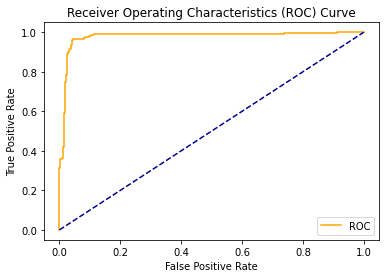

In [20]:
plot_roc_curve(fpr, tpr)